In [1]:
import tensorflow as tf
print(tf.__version__)


C:\Users\gshivani2002\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.14.0


In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

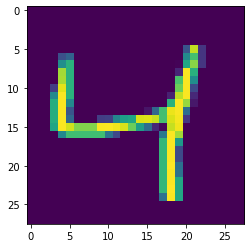

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2874 - accuracy: 0.9166 - val_loss: 0.1547 - val_accuracy: 0.9551
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1225 - accuracy: 0.9637 - val_loss: 0.1173 - val_accuracy: 0.9662
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0834 - accuracy: 0.9754 - val_loss: 0.1068 - val_accuracy: 0.9693
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0613 - accuracy: 0.9814 - val_loss: 0.1093 - val_accuracy: 0.9689
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0958 - val_accuracy: 0.9733
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.1038 - val_accuracy: 0.9732
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0317 - accuracy: 0.9892 - val_loss: 0.1072 - val_accuracy:

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9759

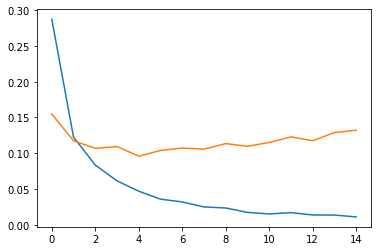

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

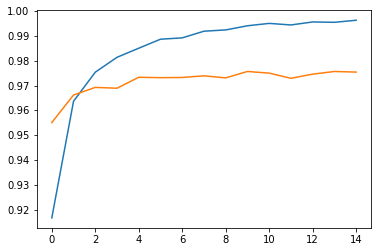

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

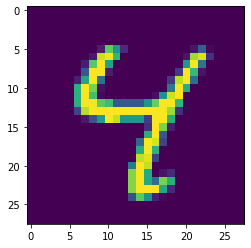

In [18]:
plt.imshow(X_test[6])

In [19]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 29ms/step


array([4], dtype=int64)

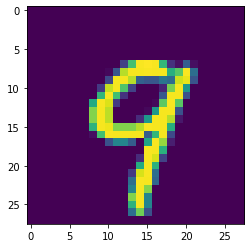

In [20]:
plt.imshow(X_test[12])

In [21]:
model.predict(X_test[12].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([9], dtype=int64)